In [12]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from copy import copy
from matplotlib.offsetbox import AnchoredText
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import numpy as np
from cartopy.geodesic import Geodesic
import shapely.geometry as sgeom
import datetime
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.io.img_tiles as cimgt
import sys

sys.path.append('..')
import funcs.ac_funcs as ac
import funcs.oco_funcs as oco

In [2]:
def plot_oco_oof():
    step_deg = 0.02
    binned_oco_xr = oco.bin_oco_soundings(trimmed_oco_df,step_deg)
    plot_text = oco.get_plottext_from_details(details,inwindow_oof_details)
    labsize = 12
    proj = ccrs.PlateCarree()
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection = proj)
    ax.set_extent([map_extent['lon_low'],map_extent['lon_high'],map_extent['lat_low'],map_extent['lat_high']],crs=proj)
    request = cimgt.GoogleTiles(style='satellite')
    scale = 9.0 # prob have to adjust this
    ax.add_image(request,int(scale))
    map = binned_oco_xr['xco2'].plot.pcolormesh('lonbin','latbin',ax = ax,alpha=0.7,cmap='viridis',add_colorbar=False)
    ax.scatter(inst_loc['lon'],inst_loc['lat'],color = 'blue',marker = 'X',s = 100)
    cp = Geodesic().circle(lon=inst_loc['lon'],lat=inst_loc['lat'],radius = radius)
    geom = sgeom.Polygon(cp)
    ax.add_geometries(geom,crs=proj,edgecolor = 'k',linewidth = 2.5,facecolor='none')
    at = AnchoredText(plot_text, loc='upper left', frameon=True, borderpad=0.5, prop=dict(size=10))
    ax.add_artist(at)
    axins = inset_axes(ax,width='40%',height='20%',loc='lower left')
    axins.scatter(oof_df.index,oof_df['xco2(ppm)'],color = 'blue',zorder=3,s=1)
    window_base = (min(oof_df.loc[oof_df['in_oco_window']].index),min(oof_df['xco2(ppm)']))
    width = max(oof_df.loc[oof_df['in_oco_window']].index)-min(oof_df.loc[oof_df['in_oco_window']].index)
    height = max(oof_df['xco2(ppm)'])-min(oof_df['xco2(ppm)'])+0.2
    rect = mpatches.Rectangle((window_base),width,height,zorder = 10,alpha = 0.5,color = 'k')
    axins.add_patch(rect)
    axins.tick_params(labelsize = labsize)
    axins.set_ylabel('EM27 XCO2 (ppm)',size = labsize-3)
    #axins.set_ylim([415,425])
    axins.xaxis.set_major_formatter(mdates.DateFormatter('%H', tz = datetime.timezone.utc))
    axins.set_xlabel(oof_df.index[0].strftime('%Z %b %d, %Y'),size = labsize)
    plt.gcf().autofmt_xdate()
    plt.colorbar(map,fraction=0.03,label ='XCO2 (ppm)')
    plt.show()

In [3]:
#ac.copy_em27_oofs_to_singlefolder('/uufs/chpc.utah.edu/common/home/lin-group9/agm/EM27/ha/results','/uufs/chpc.utah.edu/common/home/u0890904/LAIR_1/Data/EM27_oof/ha_new')

# All OCO/EM27 data comparison

In [4]:
oco_target_dates = {'oco2':['2022-05-10','2022-05-12','2022-06-26','2022-06-29','2022-07-06','2022-07-15','2022-07-22',
                            '2022-07-29','2022-07-31','2022-08-07','2022-08-14','2022-08-16','2022-08-23','2022-09-01',
                            '2022-09-08','2022-09-17','2022-09-24','2022-10-03','2022-10-10','2022-11-04','2022-11-11',
                            '2022-11-27','2022-11-29', '2022-12-13','2023-01-23','2023-01-30','2023-02-08','2023-02-24',
                            '2023-03-03','2023-03-19','2023-03-28','2023-04-04','2023-04-11','2023-04-13','2023-04-20',
                            '2023-04-27','2023-04-29','2023-05-06','2023-05-13','2023-05-15','2023-05-22','2023-05-29',
                            '2023-05-31','2023-06-16','2023-06-23','2023-07-02','2023-07-09','2023-07-18','2023-07-23',
                            '2023-07-25','2023-07-27','2023-08-01','2023-08-03','2023-08-10','2023-08-19','2023-08-26',
                            '2023-09-02','2023-09-04','2023-09-27','2023-10-06','2023-10-13','2023-10-22','2023-10-29',
                            '2023-10-31','2023-11-12','2023-11-14','2023-11-21','2023-11-23','2023-11-30','2023-12-02',
                            '2023-12-16','2023-12-25','2024-01-01','2024-01-10','2024-01-15','2024-01-17','2024-02-02',
                            '2024-02-11','2024-02-18','2024-02-25','2024-02-27','2024-03-05','2024-03-14','2024-03-21',
                            '2024-03-28','2024-03-30','2024-04-06','2024-04-13','2024-04-15','2024-04-22','2024-04-29',
                            '2024-05-01','2024-05-08','2024-05-15','2024-05-17','2024-05-24','2024-06-02'
                            ],
                     'oco3':['2022-06-09','2022-08-31','2022-12-06','2023-02-05','2023-04-08','2023-05-03',
                             '2023-08-06','2023-08-09','2023-09-23','2023-10-04']
                     }    

In [5]:
#Find oco files with soundings in radius around WBB
oco_data_folders = {'oco2':'/uufs/chpc.utah.edu/common/home/lin-group9/agm/Satellite_data/OCO/OCO2',
                    'oco3':'/uufs/chpc.utah.edu/common/home/lin-group9/agm/Satellite_data/OCO/OCO3'}
ifgs_folder = '/uufs/chpc.utah.edu/common/home/lin-group9/agm/EM27/ha/inst_data/ifgs'
oof_data_folder = "/uufs/chpc.utah.edu/common/home/u0890904/LAIR_1/Data/EM27_oof/ha_new"
oof_surround_time = datetime.timedelta(minutes=30)
inst_loc = {'lat':40.768,'lon':-111.854}
trim_extent={'lon_low':-112.4,
            'lon_high':-111.6,
            'lat_low':40.5,
            'lat_high':41.0}
radius = 10000 #m

oco_inrad = {}
for oco_type in oco_data_folders.keys():
    oco_inrad[oco_type] = {}
    oco_data_folder = oco_data_folders[oco_type]
    for oco_target_date in oco_target_dates[oco_type]:
        date = datetime.datetime.strptime(oco_target_date,'%Y-%m-%d')
        oco_filename = oco.check_for_oco_file(oco_data_folder,date)
        if oco_filename == None:
            continue
        oco_df = oco.load_oco_df(os.path.join(oco_data_folder,oco_filename),quality_flag=0)
        trimmed_oco_df = oco.trim_oco_df_to_extent(oco_df,trim_extent)
        if len(trimmed_oco_df)==0:
             continue
        trimmed_oco_df = oco.add_oco_inradius_column(trimmed_oco_df,inst_loc,radius)
        inradius_oco_df = trimmed_oco_df.loc[trimmed_oco_df['inradius']]
        if len(inradius_oco_df)==0:
            continue
        inradius_oco_details = oco.get_oco_details(inradius_oco_df)
        oco_inrad[oco_type][oco_target_date] = inradius_oco_details
        oco_inrad[oco_type][oco_target_date]['oco_fullpath'] = os.path.join(oco_data_folder,oco_filename)


#Find the dates that at least contain some ifgs corresponding with good oco data -- use this to know what retrievals to run
dates_with_ifgs = {'oco2':[],'oco3':[]}
for oco_type in oco_inrad.keys():
    for date in oco_inrad[oco_type].keys():
        datestr = date.replace('-','')
        if datestr in os.listdir(ifgs_folder):
            dates_with_ifgs[oco_type].append(datestr)



In [6]:
my_oof_manager = ac.oof_manager(oof_data_folder,'UTC')
oco_em27_dicts = {}
for oco_type in oco_inrad.keys():
    oco_em27_dicts[oco_type] = {}
    for day in oco_inrad[oco_type].keys():
        inradius_oco_details = oco_inrad[oco_type][day]
        start_dt = inradius_oco_details['oco_window_start']-oof_surround_time
        end_dt = inradius_oco_details['oco_window_end'] + oof_surround_time
        oof_df = my_oof_manager.load_oof_df_inrange(start_dt,end_dt,filter_flag_0=False)
        if len(oof_df) == 0:
            continue
        oof_df = oco.add_oof_inwindow_column(oof_df,inradius_oco_details,oof_surround_time)
        inwindow_oof_df = oof_df.loc[oof_df['in_oco_window']]
        if len(inwindow_oof_df) == 0:
            print(f'No EM27 in window for {day}')
            continue
        inwindow_oof_details = oco.get_oof_details(inwindow_oof_df)
        appenddict = copy(inwindow_oof_details)
        appenddict.update(oco_inrad[oco_type][day])
        oco_em27_dicts[oco_type][day] = appenddict
        date = datetime.datetime.strptime(day,'%Y-%m-%d')
        oof_filename = oco.check_for_oof_file(oof_data_folder,date)
        oco_em27_dicts[oco_type][day]['oof_fullpath'] = os.path.join(oof_data_folder,oof_filename)


In [21]:
oco_em27_dict = oco_em27_dicts['oco3']
comparison_df_oco = pd.DataFrame(oco_em27_dict).transpose()
print('rmse', np.sqrt(((comparison_df_oco['em27_xco2_mean'] - comparison_df_oco['oco_xco2_mean'])**2).mean()))
print('offset', (comparison_df_oco['em27_xco2_mean'] - comparison_df_oco['oco_xco2_mean']).mean())

rmse 0.17589975041208203
offset 0.018477909671219095


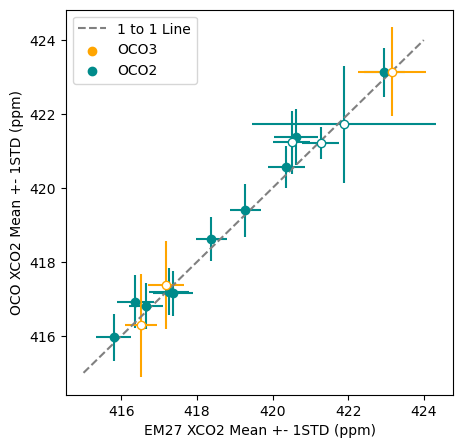

In [7]:
fig,ax = plt.subplots(figsize = (5,5))
for oco_type in oco_em27_dicts.keys():
        oco_em27_dict = oco_em27_dicts[oco_type]
        comparison_df_oco = pd.DataFrame(oco_em27_dict).transpose()
        comparison_df_oco_over = comparison_df_oco.loc[comparison_df_oco['oco_num_soundings']>100]
        comparison_df_oco_under = comparison_df_oco.loc[comparison_df_oco['oco_num_soundings']<100]
        if oco_type =='oco2':
                color = 'darkcyan'
        else:
                color = 'orange'
        ax.errorbar(comparison_df_oco_over['em27_xco2_mean'],comparison_df_oco_over['oco_xco2_mean'],
                        xerr=comparison_df_oco_over['em27_xco2_std'],
                        yerr=comparison_df_oco_over['oco_xco2_std'],
                        color = color,fmt='o')
        ax.errorbar(comparison_df_oco_under['em27_xco2_mean'],comparison_df_oco_under['oco_xco2_mean'],
                        xerr=comparison_df_oco_under['em27_xco2_std'],
                        yerr=comparison_df_oco_under['oco_xco2_std'],
                        color = color,fmt='o',mfc='white')
ax.plot(range(415,425),range(415,425),'--',color = 'grey',label = '1 to 1 Line')
ax.scatter([],[],color = 'orange',label = 'OCO3')
ax.scatter([],[],color = 'darkcyan',label='OCO2')
ax.set_ylabel('OCO XCO2 Mean +- 1STD (ppm)')
ax.set_xlabel('EM27 XCO2 Mean +- 1STD (ppm)')
ax.legend()
plt.show()

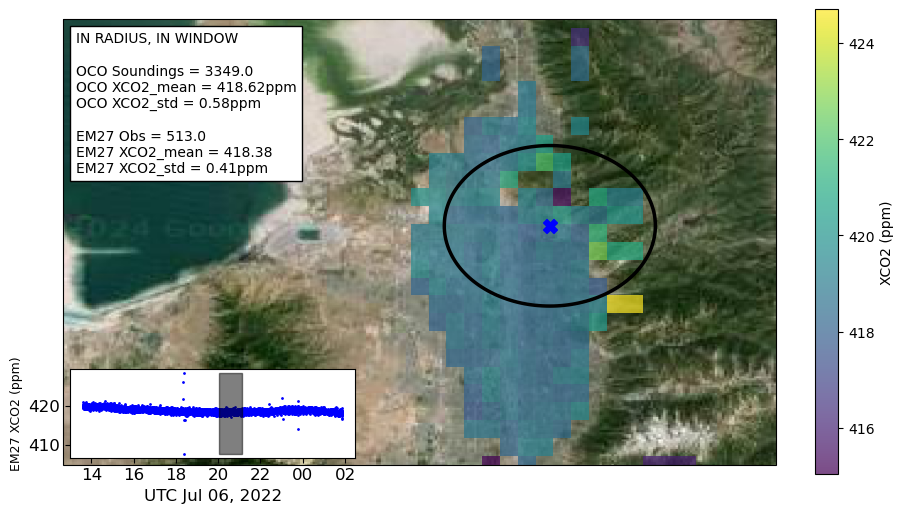

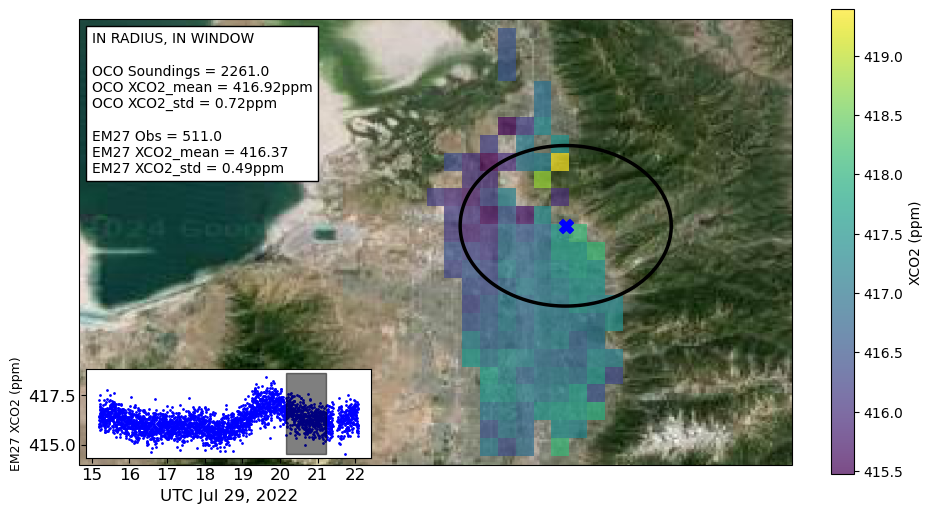

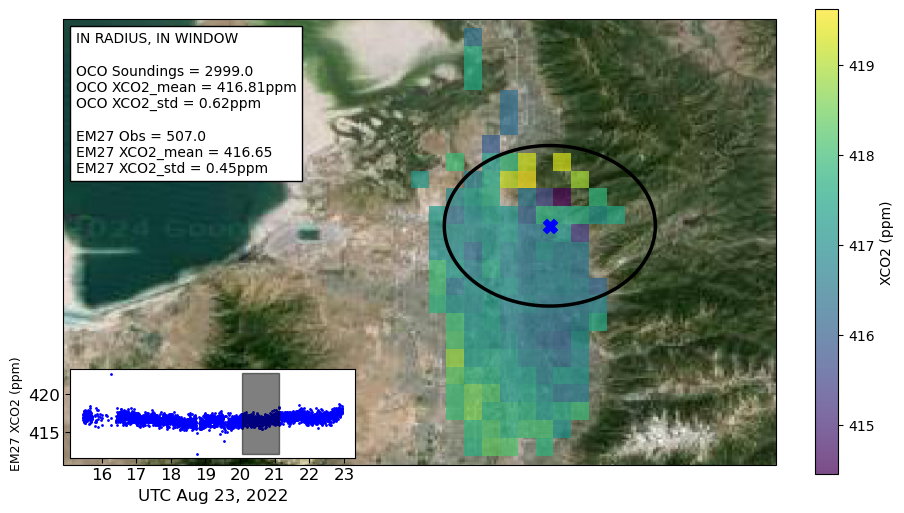

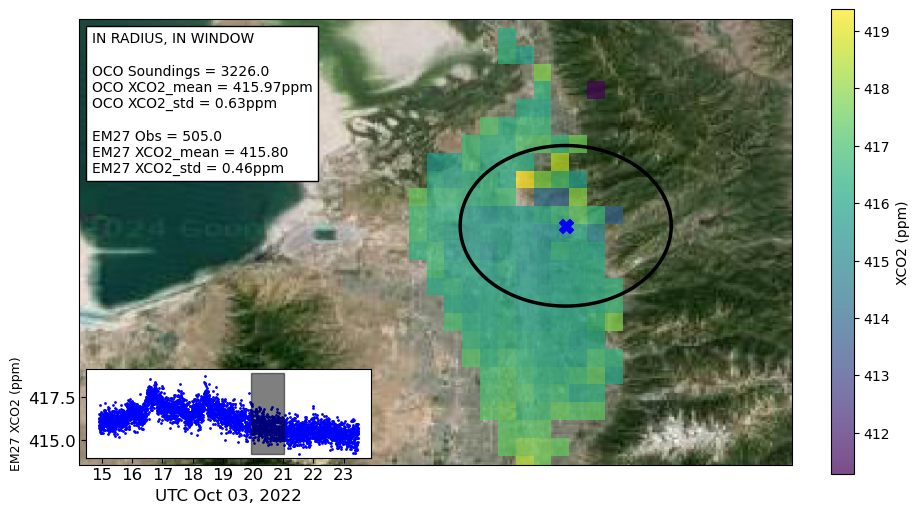

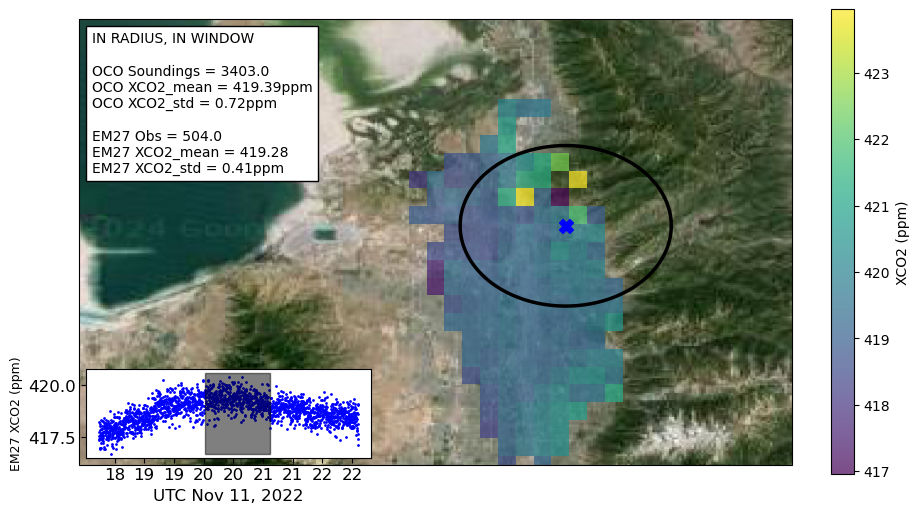

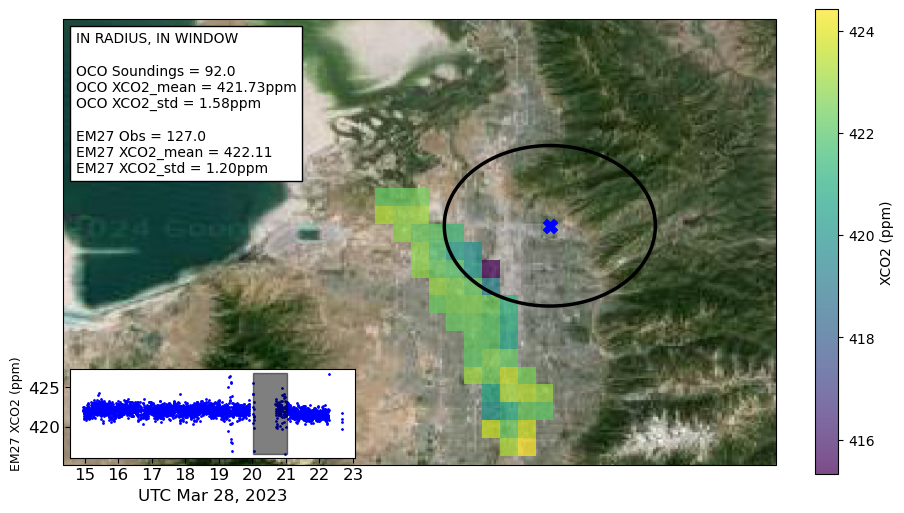

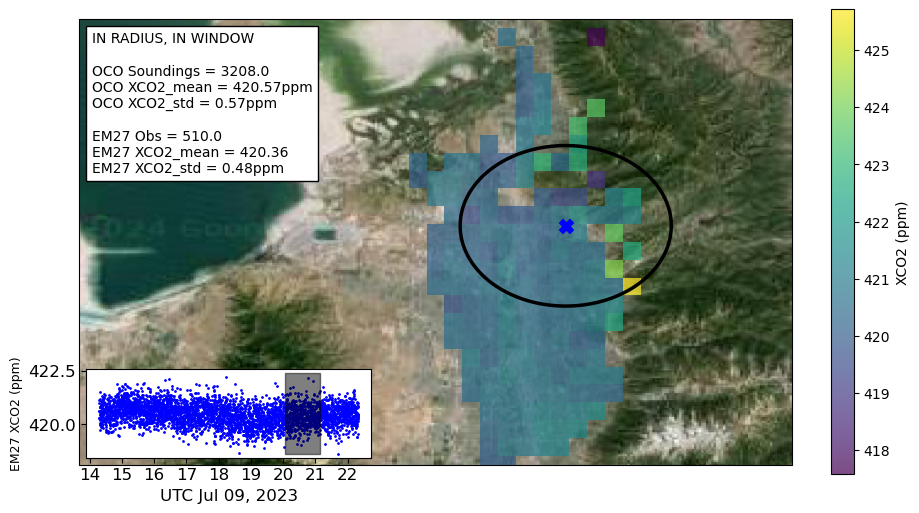

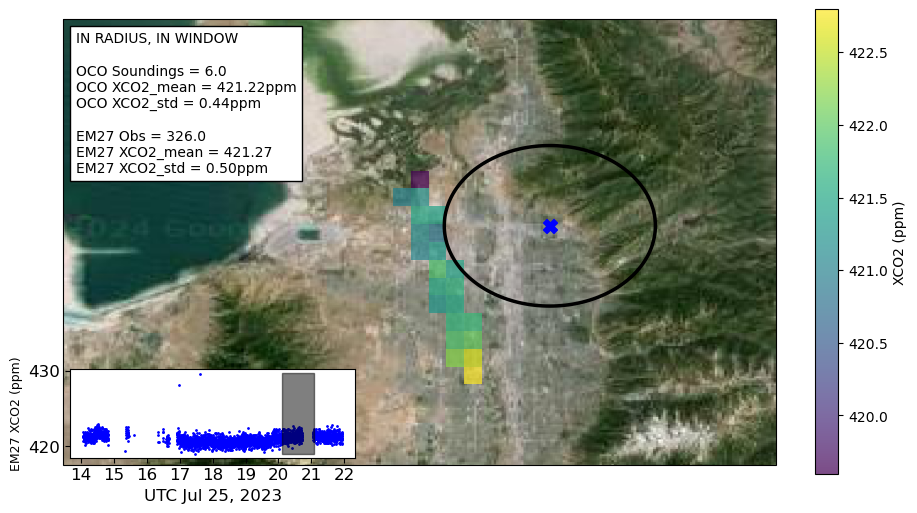

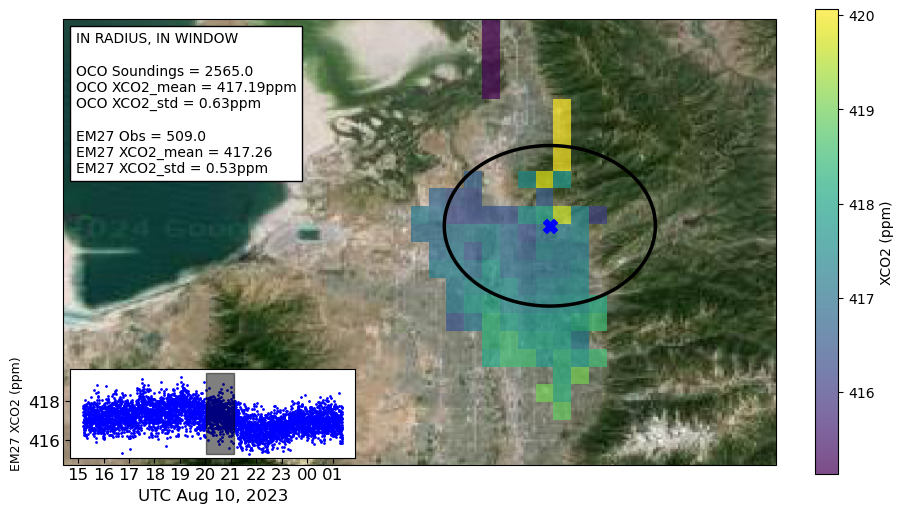

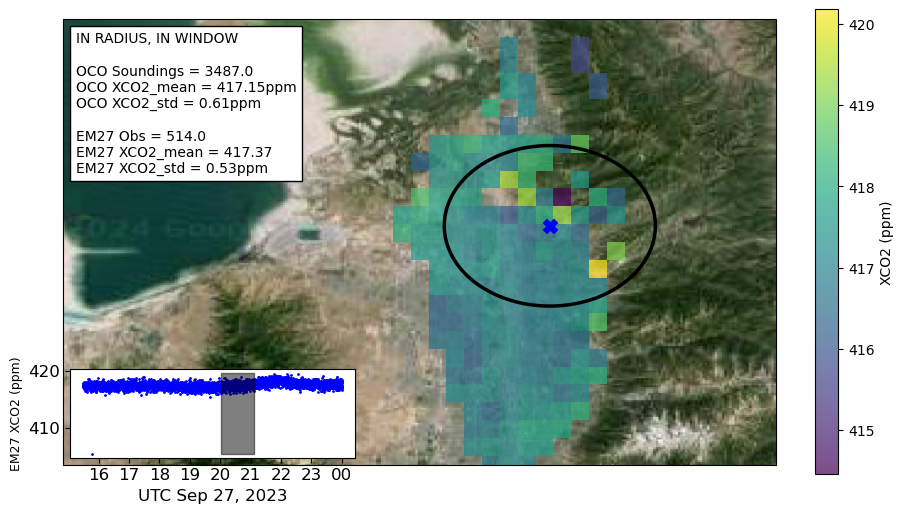

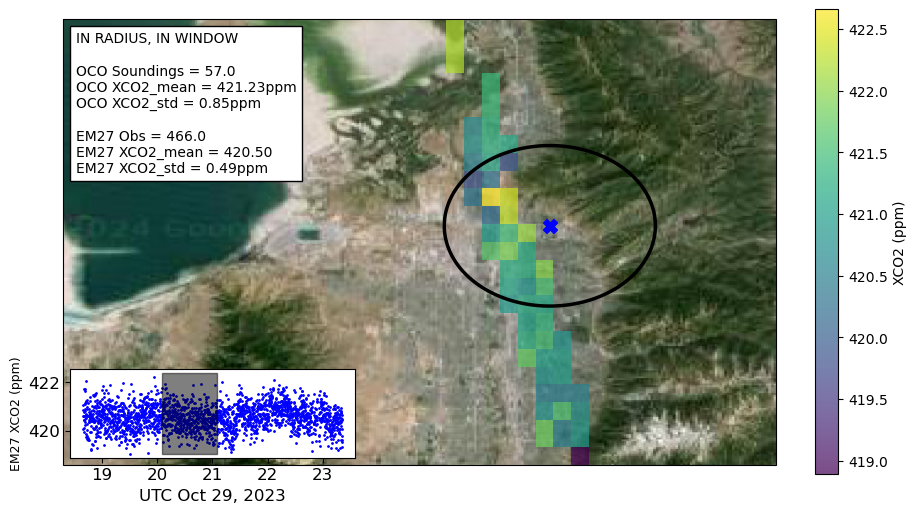

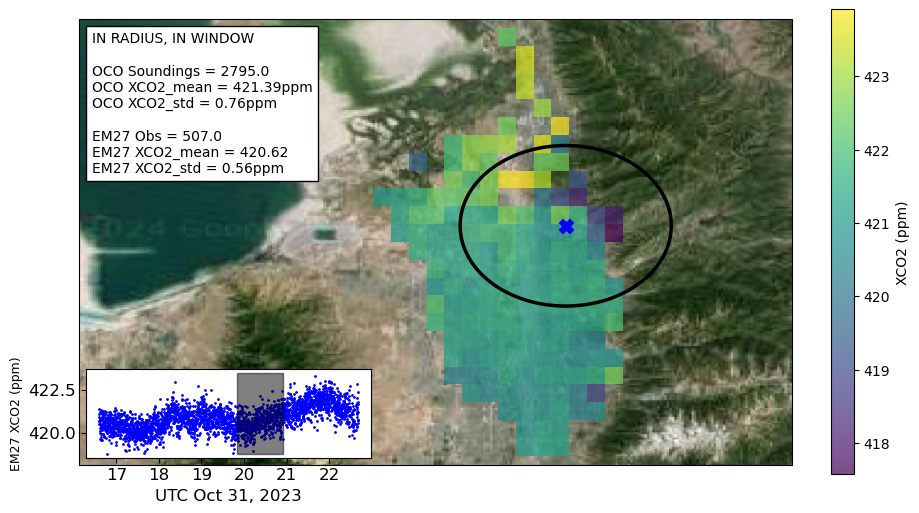

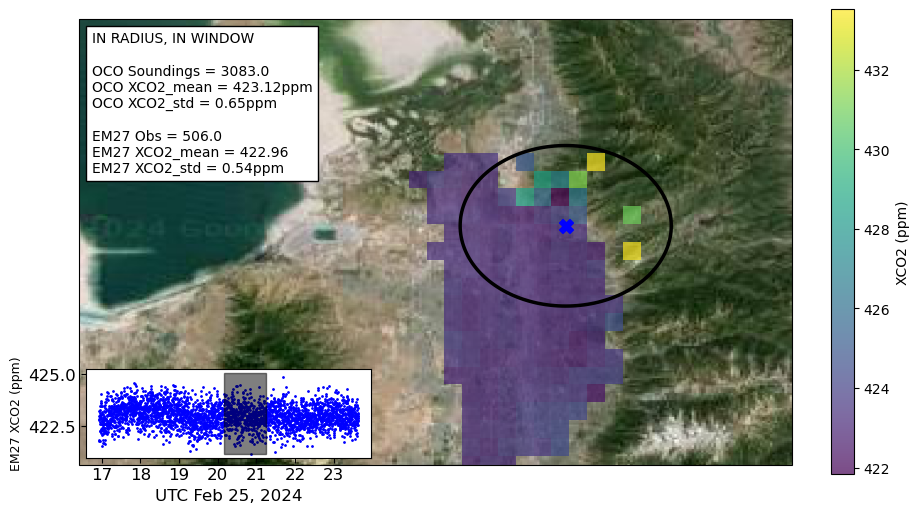

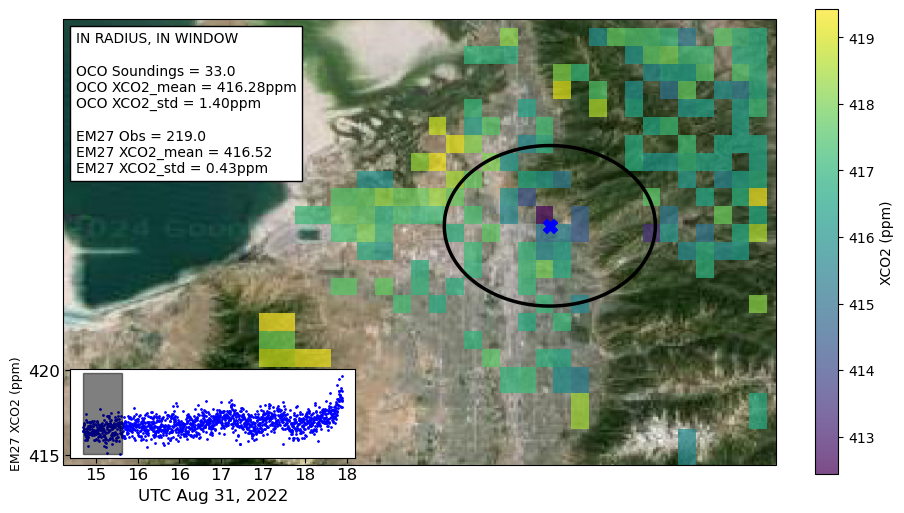

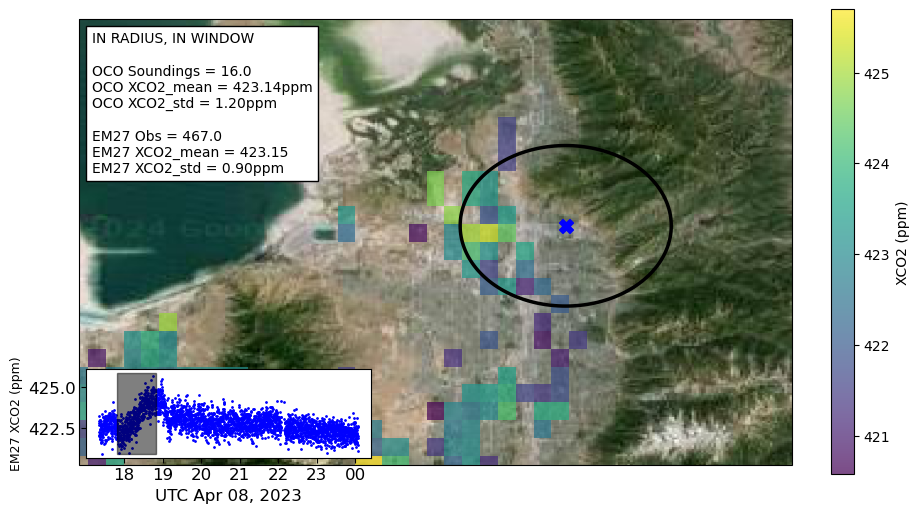

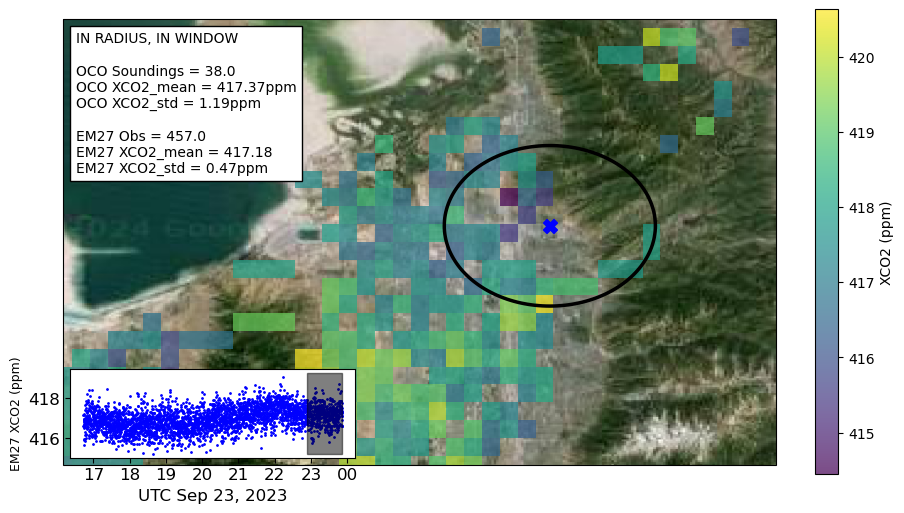

In [8]:
map_extent={'lon_low':-112.4,
            'lon_high':-111.6,
            'lat_low':40.5,
            'lat_high':41.0}
for oco_type, oco_em27_dict in oco_em27_dicts.items():
     for day, details in oco_em27_dict.items():
          oco_df = oco.load_oco_df(details['oco_fullpath'],quality_flag=0)
          trimmed_oco_df = oco.trim_oco_df_to_extent(oco_df,trim_extent)
          trimmed_oco_df = oco.add_oco_inradius_column(trimmed_oco_df,inst_loc,radius)
          inradius_oco_df = trimmed_oco_df.loc[trimmed_oco_df['inradius']]
          oof_df = my_oof_manager.df_from_oof(details['oof_fullpath'],fullformat = True, filter_flag_0=True)
          oof_df = oco.add_oof_inwindow_column(oof_df,details,oof_surround_time)
          inwindow_oof_df = oof_df.loc[oof_df['in_oco_window']]
          inwindow_oof_details = oco.get_oof_details(inwindow_oof_df)

          plot_oco_oof()